In [ ]:
#установка библиотек
# !pip install psycopg2
# !pip install plotly

In [70]:
#проверка подключения PostgreSQL 
import psycopg2
import pandas as pd
#Библиотека ждя визуализации
from IPython.display import HTML
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

#!введите свои реквизиты!
DB_HOST = '52.157.159.24'
DB_USER = 'student3'
DB_USER_PASSWORD = 'student3_password'
DB_NAME = 'sql_ex_for_student3'

conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

--task10 (lesson4)
-- Компьютерная фирма: На базе products_price_categories_with_makers по строить по каждому производителю график (X: category_price, Y: count)


In [2]:
request = """
select * from products_price_categories_with_makers
"""
df = pd.read_sql_query(request, conn)

<Figure size 432x288 with 0 Axes>

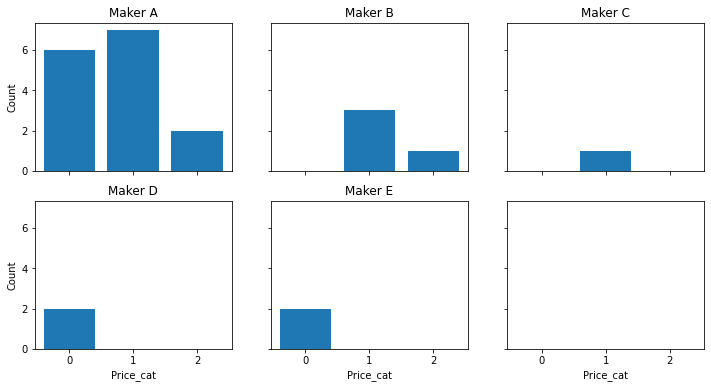

In [60]:
plt.tight_layout()
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True)

for ax, maker in zip(axes.flatten(), sorted(df.maker.unique())):
  temp_df = df[df['maker']==maker].sort_values('category_price')
  ax.bar(temp_df['category_price'], temp_df['count'])
  ax.set_title('Maker {}'.format(maker))
  if maker == 'A' or maker == 'D':
    ax.set_ylabel('Count')
  if maker == 'D' or maker == 'E':
    ax.set_xlabel('Price_cat')

axes.flatten()[-1].set_xlabel('Price_cat')
fig.set_size_inches(12,6)

--task11 (lesson4)
-- Компьютерная фирма: На базе products_price_categories_with_makers по строить по A & D график (X: category_price, Y: count)


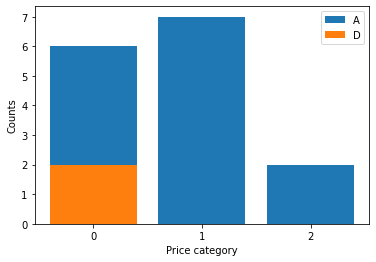

In [67]:
plt.figure()
plt.bar(df.query("maker=='A'").sort_values('category_price')['category_price'],
        df.query("maker=='A'").sort_values('category_price')['count'],
        label='A')
plt.bar(df.query("maker=='D'").sort_values('category_price')['category_price'],
        df.query("maker=='D'").sort_values('category_price')['count'],
        label='D')

plt.xticks(list(range(3)))
plt.legend()
plt.xlabel('Price category')
plt.ylabel('Counts');

--task7 (lesson4)
-- По предыдущему view (count_products_by_makers) сделать график в colab (X: maker, y: count)


<BarContainer object of 5 artists>

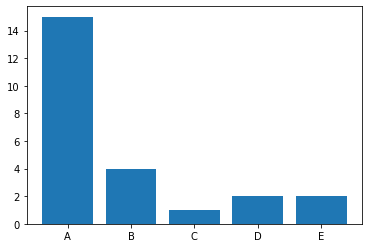

In [72]:
request = """
select * from count_products_by_makers
"""
df = pd.read_sql_query(request, conn)

plt.figure()
plt.bar(df['maker'].sort_values(),
        df.sort_values('maker')['count'])